In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, linregress
import os
from datetime import datetime
import sys
sys.path.append('/home/wallacelab/complexity-final/Optimizations')

import optimization

In [2]:
# Parameters
num_simulations = 1  # Number of simulations to run
task_name = "complexity_prediction"
predictor_columns = ["Irregularity", "Disorganized", "Asymmetry", "Chaotic", "Randomness", 
                     "Variability", "Multicolored", "Heterogeneity", "Grainy", "Isotropy", 
                     "Cluttered", "Ambiguity", "Intricate"]
all_weights = []
spearman_rhos = []

Results will be saved in: ./optimization_results_20241120_164253
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.019574770111852997
Predictor Disorganized: Initial Spearman rho = -0.09387472817610071
Predictor Asymmetry: Initial Spearman rho = -0.03718861245976088
Predictor Chaotic: Initial Spearman rho = 0.24123387363835086
Predictor Randomness: Initial Spearman rho = -0.00011252454651559552
Predictor Variability: Initial Spearman rho = -0.016513352282985363
Predictor Multicolored: Initial Spearman rho = 0.31073503487553017
Predictor Heterogeneity: Initial Spearman rho = -0.07798326155352488
Predictor Grainy: Initial Spearman rho = -0.18993018206367365
Predictor Isotropy: Initial Spearman rho = 0.11379457356393485
Predictor Cluttered: Initial Spearman rho = -0.20539855639135088
Predictor Ambiguity: Initial Spearman rho = -0.17963418605749668
Predictor Intricate: Initial 

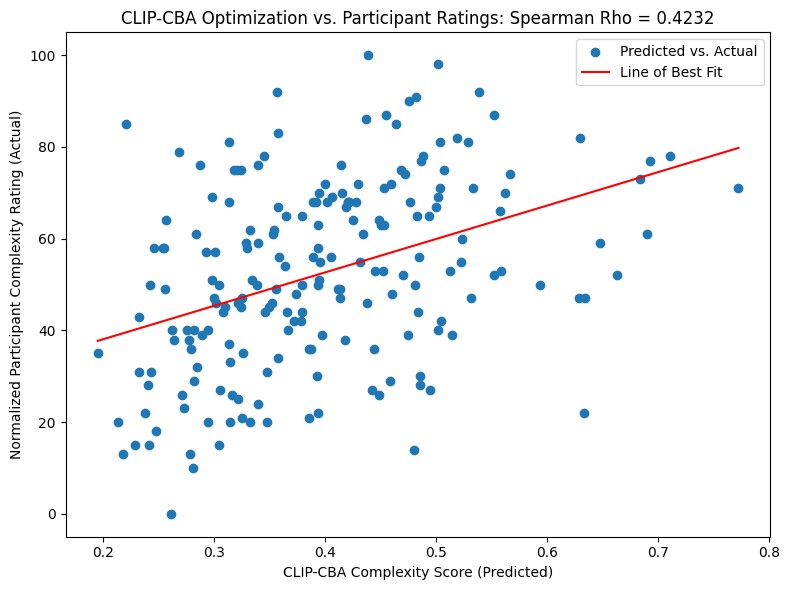

In [9]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_ad.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Advertisement/savoias_advertisement_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_ad.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Advertisement/savoias_advertisement_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-CBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-CBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_art.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Art/savoias_art_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_art.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Art/savoias_art_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-CBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-CBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

Results will be saved in: ./optimization_results_20241127_114618
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.07824857438285247
Predictor Disorganized: Initial Spearman rho = 0.09212138159750755
Predictor Asymmetry: Initial Spearman rho = -0.08010037014611138
Predictor Chaotic: Initial Spearman rho = 0.5299029214930528
Predictor Randomness: Initial Spearman rho = 0.08342983754994787
Predictor Variability: Initial Spearman rho = -0.20313595229441173
Predictor Multicolored: Initial Spearman rho = 0.34126510946063626
Predictor Heterogeneity: Initial Spearman rho = -0.1239417060276739
Predictor Grainy: Initial Spearman rho = -0.1822182217480488
Predictor Isotropy: Initial Spearman rho = -0.2395300825423728
Predictor Cluttered: Initial Spearman rho = 0.0855137010036818
Predictor Ambiguity: Initial Spearman rho = -0.4025169006564403
Predictor Intricate: Initial Spearman rho 

ValueError: too many values to unpack (expected 2)

Results will be saved in: ./optimization_results_20241120_164954
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.3341495990708123
Predictor Disorganized: Initial Spearman rho = 0.0459925347142227
Predictor Asymmetry: Initial Spearman rho = -0.3406256456526532
Predictor Chaotic: Initial Spearman rho = 0.4840109587575442
Predictor Randomness: Initial Spearman rho = 0.34752182500625384
Predictor Variability: Initial Spearman rho = -0.46848405189264875
Predictor Multicolored: Initial Spearman rho = 0.5393244391080958
Predictor Heterogeneity: Initial Spearman rho = -0.276135265187519
Predictor Grainy: Initial Spearman rho = -0.44619300740241996
Predictor Isotropy: Initial Spearman rho = -0.3564346416643017
Predictor Cluttered: Initial Spearman rho = 0.6276663572157095
Predictor Ambiguity: Initial Spearman rho = -0.6484269180373846
Predictor Intricate: Initial Spearman rho = 0.

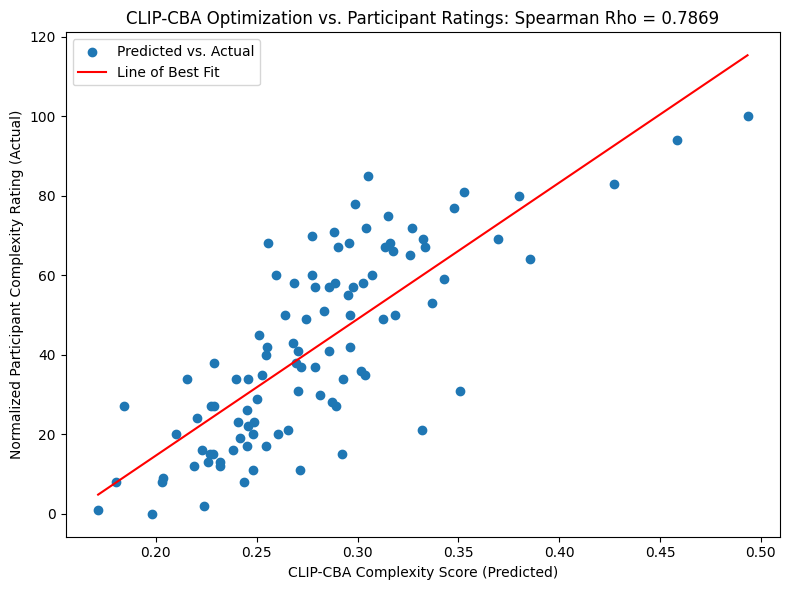

In [12]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_interior_design.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Interior_Design/savoias_interior_design_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_interior_design.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Interior_Design/savoias_interior_design_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-CBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-CBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

Results will be saved in: ./optimization_results_20241120_165257
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.013612275420466748
Predictor Disorganized: Initial Spearman rho = -0.07601074790750767
Predictor Asymmetry: Initial Spearman rho = -0.04877269431348432
Predictor Chaotic: Initial Spearman rho = 0.2640868449312683
Predictor Randomness: Initial Spearman rho = -0.009184872712895122
Predictor Variability: Initial Spearman rho = -0.13077866459288498
Predictor Multicolored: Initial Spearman rho = 0.04288624411925956
Predictor Heterogeneity: Initial Spearman rho = -0.12295606963616575
Predictor Grainy: Initial Spearman rho = -0.16166546213296532
Predictor Isotropy: Initial Spearman rho = -0.10079430105097621
Predictor Cluttered: Initial Spearman rho = 0.19490698978132545
Predictor Ambiguity: Initial Spearman rho = -0.3395687350094236
Predictor Intricate: Initial Spear

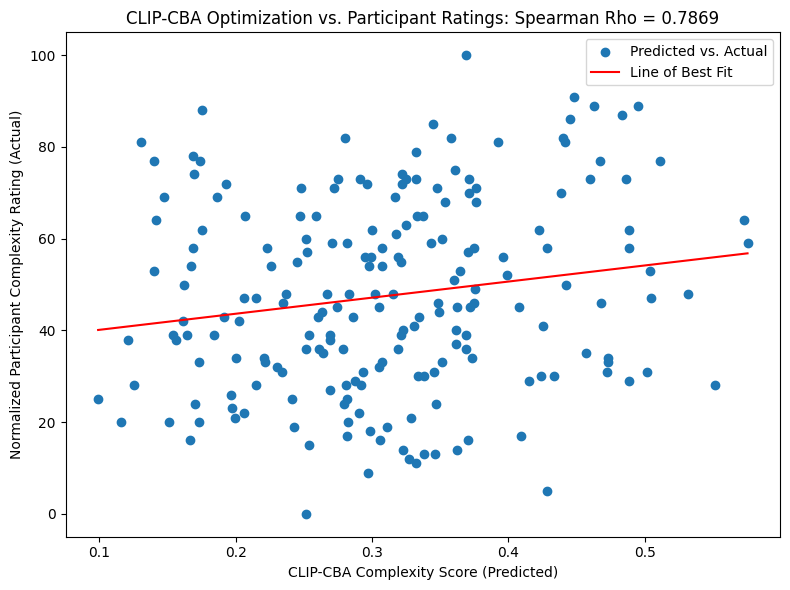

In [13]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_objects.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Objects/savoias_objects_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_objects.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Objects/savoias_objects_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-CBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-CBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_scenes.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Scenes/savoias_scenes_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_scenes.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Scenes/savoias_scenes_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-CBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-CBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

Results will be saved in: ./optimization_results_20241127_120533
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.03862663913804742
Predictor Disorganized: Initial Spearman rho = -0.3039036297511541
Predictor Asymmetry: Initial Spearman rho = -0.09131131764828963
Predictor Chaotic: Initial Spearman rho = 0.4245281720857848
Predictor Randomness: Initial Spearman rho = 0.03434211681948399
Predictor Variability: Initial Spearman rho = -0.09050247485764429
Predictor Multicolored: Initial Spearman rho = 0.2930472597585972
Predictor Heterogeneity: Initial Spearman rho = -0.21010277604977304
Predictor Grainy: Initial Spearman rho = -0.17003135612988446
Predictor Isotropy: Initial Spearman rho = -0.2185897641719069
Predictor Cluttered: Initial Spearman rho = 0.1951904697447046
Predictor Ambiguity: Initial Spearman rho = -0.37706726993179385
Predictor Intricate: Initial Spearman rh

OSError: Cannot save file into a non-existent directory: 'optimization_results_20241127_120533'

Results will be saved in: ./optimization_results_20241120_170248
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.24841548673858418
Predictor Disorganized: Initial Spearman rho = 0.28076009661159945
Predictor Asymmetry: Initial Spearman rho = 0.16772501816689783
Predictor Chaotic: Initial Spearman rho = 0.506686206249759
Predictor Randomness: Initial Spearman rho = -0.0024968190215576853
Predictor Variability: Initial Spearman rho = -0.44999160894775453
Predictor Multicolored: Initial Spearman rho = 0.5570067126842293
Predictor Heterogeneity: Initial Spearman rho = -0.3425383614887467
Predictor Grainy: Initial Spearman rho = -0.3708076345453253
Predictor Isotropy: Initial Spearman rho = 0.017831849310211256
Predictor Cluttered: Initial Spearman rho = -0.13440808934798748
Predictor Ambiguity: Initial Spearman rho = -0.18919406057101285
Predictor Intricate: Initial Spearman 

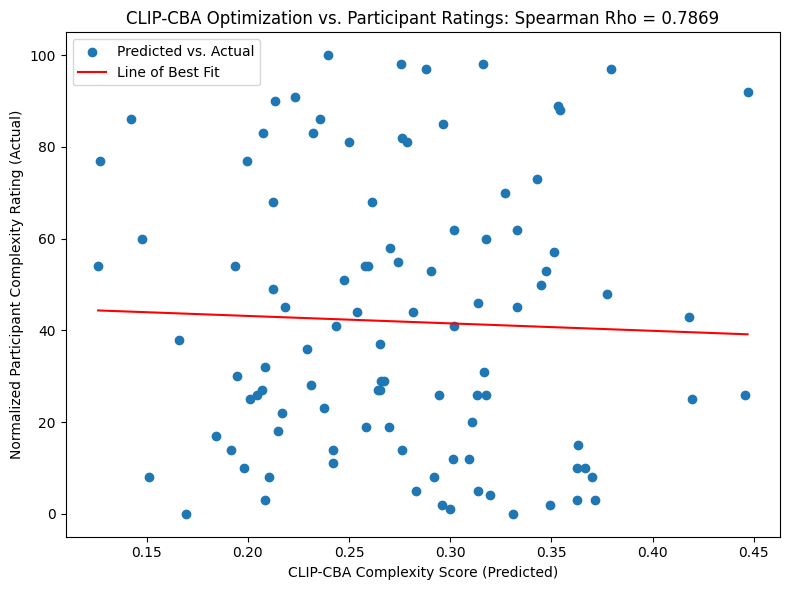

In [16]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_sup.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Suprematism/savoias_suprematism_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_sup.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Suprematism/savoias_suprematism_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-CBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-CBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

Results will be saved in: ./optimization_results_20241120_170649
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.2443490880075415
Predictor Disorganized: Initial Spearman rho = -0.054059001670867836
Predictor Asymmetry: Initial Spearman rho = -0.10747888213971557
Predictor Chaotic: Initial Spearman rho = 0.1775586719696721
Predictor Randomness: Initial Spearman rho = 0.011450921536193679
Predictor Variability: Initial Spearman rho = -0.061326379845951
Predictor Multicolored: Initial Spearman rho = 0.03892863236952316
Predictor Heterogeneity: Initial Spearman rho = -0.15138770894610673
Predictor Grainy: Initial Spearman rho = -0.10057832352776366
Predictor Isotropy: Initial Spearman rho = -0.2642713660395252
Predictor Cluttered: Initial Spearman rho = 0.11833044001345142
Predictor Ambiguity: Initial Spearman rho = -0.17328361125334268
Predictor Intricate: Initial Spearman 

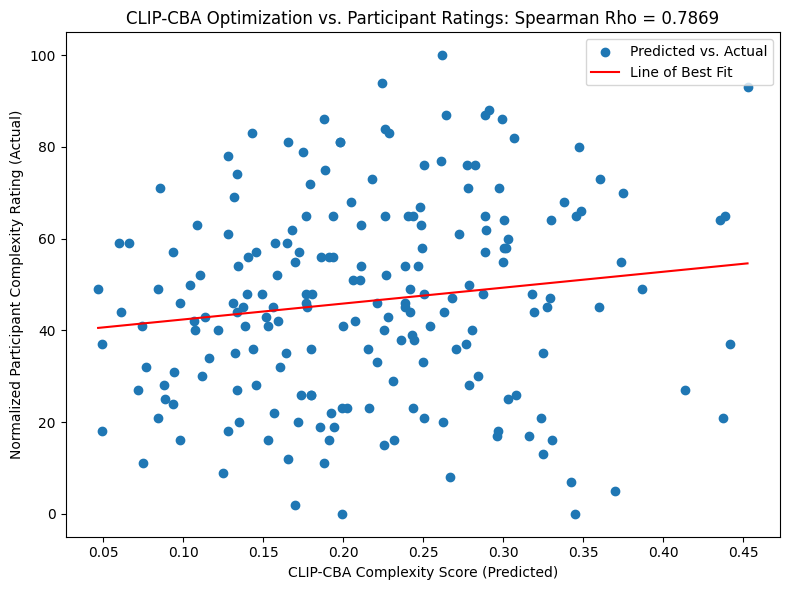

In [18]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_vis.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Visualizations/savoias_visualizations_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_vis.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Visualizations/savoias_visualizations_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-CBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-CBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()